<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Diferencias_progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         xi  u(xi, 0.5) (numérica)  u(xi, 0.5) (exacta)  \
0  0.000000               0.000000         0.000000e+00   
1  0.111111               0.000807         2.459769e-03   
2  0.222222               0.001517         4.622854e-03   
3  0.333333               0.002044         6.228354e-03   
4  0.444444               0.002324         7.082622e-03   
5  0.555556               0.002324         7.082622e-03   
6  0.666667               0.002044         6.228354e-03   
7  0.777778               0.001517         4.622854e-03   
8  0.888889               0.000807         2.459769e-03   
9  1.000000               0.000000         8.807517e-19   

   |u(xi, 0.5) - u_exact|  
0            0.000000e+00  
1            1.652523e-03  
2            3.105727e-03  
3            4.184335e-03  
4            4.758250e-03  
5            4.758250e-03  
6            4.184335e-03  
7            3.105727e-03  
8            1.652523e-03  
9            8.807517e-19  


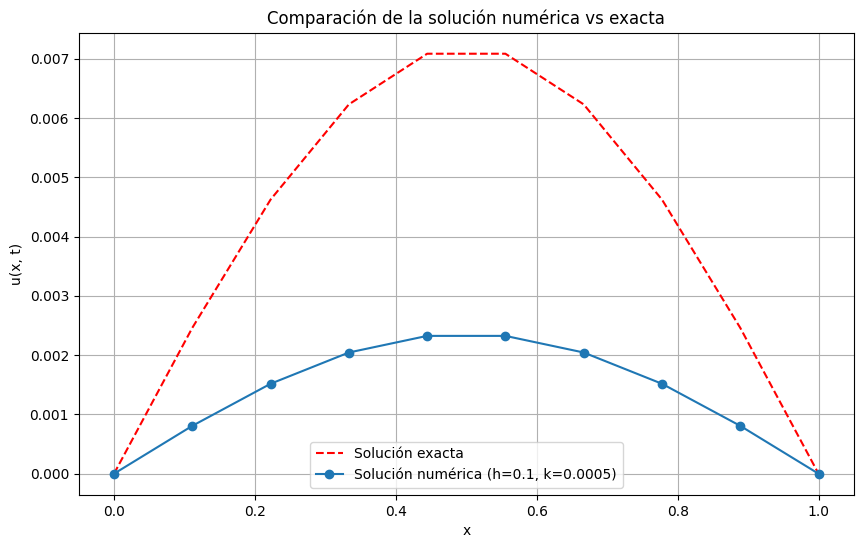

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros dados
h_values = [0.1, 0.01]  # Tamaños de paso en x
k_values = [0.0005, 0.01]  # Tamaños de paso en t
L = 1  # Longitud del dominio espacial
T = 0.5  # Tiempo final
x_points = 10  # Número de puntos en x para h = 0.1
x_points_fine = 100  # Número de puntos en x para h = 0.01

# Función para la condición inicial
def u_initial(x):
    return np.sin(np.pi * x)

# Función para la solución exacta
def u_exact(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

# Función para la solución numérica con el esquema de diferencias progresivas
def heat_equation(h, k, T, L, x_points):
    # Discretización en el espacio y tiempo
    x = np.linspace(0, L, x_points)
    t_steps = int(T / k)

    # Inicializamos el array de la solución
    u = np.zeros((x_points, t_steps + 1))

    # Condición inicial
    u[:, 0] = u_initial(x)

    # Esquema de diferencias progresivas
    r = k / h**2  # Parámetro de estabilidad
    for n in range(t_steps):
        for i in range(1, x_points - 1):
            u[i, n+1] = u[i, n] + r * (u[i-1, n] - 2*u[i, n] + u[i+1, n])

    return x, u

# Solución numérica con h=0.1, k=0.0005
h = 0.1
k = 0.0005
x_num, u_num = heat_equation(h, k, T, L, x_points)

# Solución numérica con h=0.01, k=0.01
h_fine = 0.01
k_fine = 0.01
x_num_fine, u_num_fine = heat_equation(h_fine, k_fine, T, L, x_points_fine)

# Comparación con la solución exacta
t_exact = 0.5
u_exact_values = u_exact(x_num, t_exact)

# Comparación tabular (para h=0.1, k=0.0005)
import pandas as pd
comparison_table = pd.DataFrame({
    'xi': x_num,
    'u(xi, 0.5) (numérica)': u_num[:, int(t_exact / k)],
    'u(xi, 0.5) (exacta)': u_exact_values,
    '|u(xi, 0.5) - u_exact|': np.abs(u_num[:, int(t_exact / k)] - u_exact_values)
})

# Mostrar la tabla comparativa
print(comparison_table)

# Comparación gráfica de la solución numérica vs exacta
plt.figure(figsize=(10, 6))
plt.plot(x_num, u_exact_values, label="Solución exacta", color='r', linestyle='--')
plt.plot(x_num, u_num[:, int(t_exact / k)], label="Solución numérica (h=0.1, k=0.0005)", marker='o')
plt.title('Comparación de la solución numérica vs exacta')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.grid(True)
plt.show()

# Comentarios sobre la variación de h y k
# A medida que se reduce el tamaño del paso espacial (h) y el paso temporal (k), la solución numérica
# se aproxima más a la solución exacta, pero también aumenta el costo computacional.
# La relación entre h y k debe cumplir con el criterio de estabilidad (condición de Courant-Friedrichs-Lewy).
